## Imports
Execute the cell below to import all packages needed.

In [1]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from skimage import io

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_joh_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'

joh_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)
joh_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

joh_join_df = joh_tweets_df.join(joh_users_df.set_index('user_id'), on='user_id')

## Extract & Count Emojis for all

In [3]:
extract = Extractor()

count = extract.count_all_emoji(joh_join_df['text'])

# Display most common
count.most_common()

[('😂', 927229),
 ('😭', 190321),
 ('🤣', 189896),
 ('🔥', 136057),
 ('😍', 93776),
 ('❤', 92624),
 ('💔', 40228),
 ('💀', 35877),
 ('😩', 33553),
 ('😅', 29872),
 ('😊', 26942),
 ('😢', 25902),
 ('🙏', 19699),
 ('👏', 19161),
 ('🙌', 18165),
 ('🤔', 18054),
 ('😁', 17479),
 ('😹', 16310),
 ('💕', 15555),
 ('👀', 14580),
 ('🙄', 14106),
 ('💃', 13801),
 ('😘', 13574),
 ('👌', 13255),
 ('♥', 12228),
 ('🙈', 11303),
 ('🙏🏾', 10642),
 ('😔', 10469),
 ('🤗', 10084),
 ('💯', 10079),
 ('😒', 10067),
 ('✨', 9350),
 ('😏', 8063),
 ('🙌🏾', 7998),
 ('😀', 7802),
 ('😱', 7756),
 ('😉', 7503),
 ('😋', 7469),
 ('☺', 7467),
 ('😥', 6992),
 ('😳', 6920),
 ('😑', 6809),
 ('🎉', 6540),
 ('😎', 6472),
 ('😫', 6364),
 ('👏🏾', 6361),
 ('😆', 6204),
 ('💜', 6182),
 ('💖', 5961),
 ('🙃', 5948),
 ('😕', 5882),
 ('😣', 5828),
 ('✊', 5809),
 ('😃', 5762),
 ('😪', 5734),
 ('💛', 5597),
 ('😄', 5415),
 ('🙏🏽', 5346),
 ('😤', 5327),
 ('🙂', 5146),
 ('🚀', 5061),
 ('🎶', 4977),
 ('👑', 4901),
 ('🏆', 4812),
 ('🙌🏽', 4730),
 ('🙆', 4686),
 ('😐', 4600),
 ('👏🏽', 4529),
 ('💃🏽',

## Create a Sorted Pandas DataFrame with Emoji Counts 

In [4]:
# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df

,Emoji,Count
2148,🧖‍♂️,1
859,🇻🇮,1
1991,🥌,1
1990,♟,1
1752,👩🏻‍🏫,1
1753,👩🏿‍🔬,1
1987,👨‍⚖️,1
1754,👩🏼‍⚖️,1
1984,👱‍♀️,1
1768,🚣🏽‍♀️,1


## Top 15 Emojis Graph

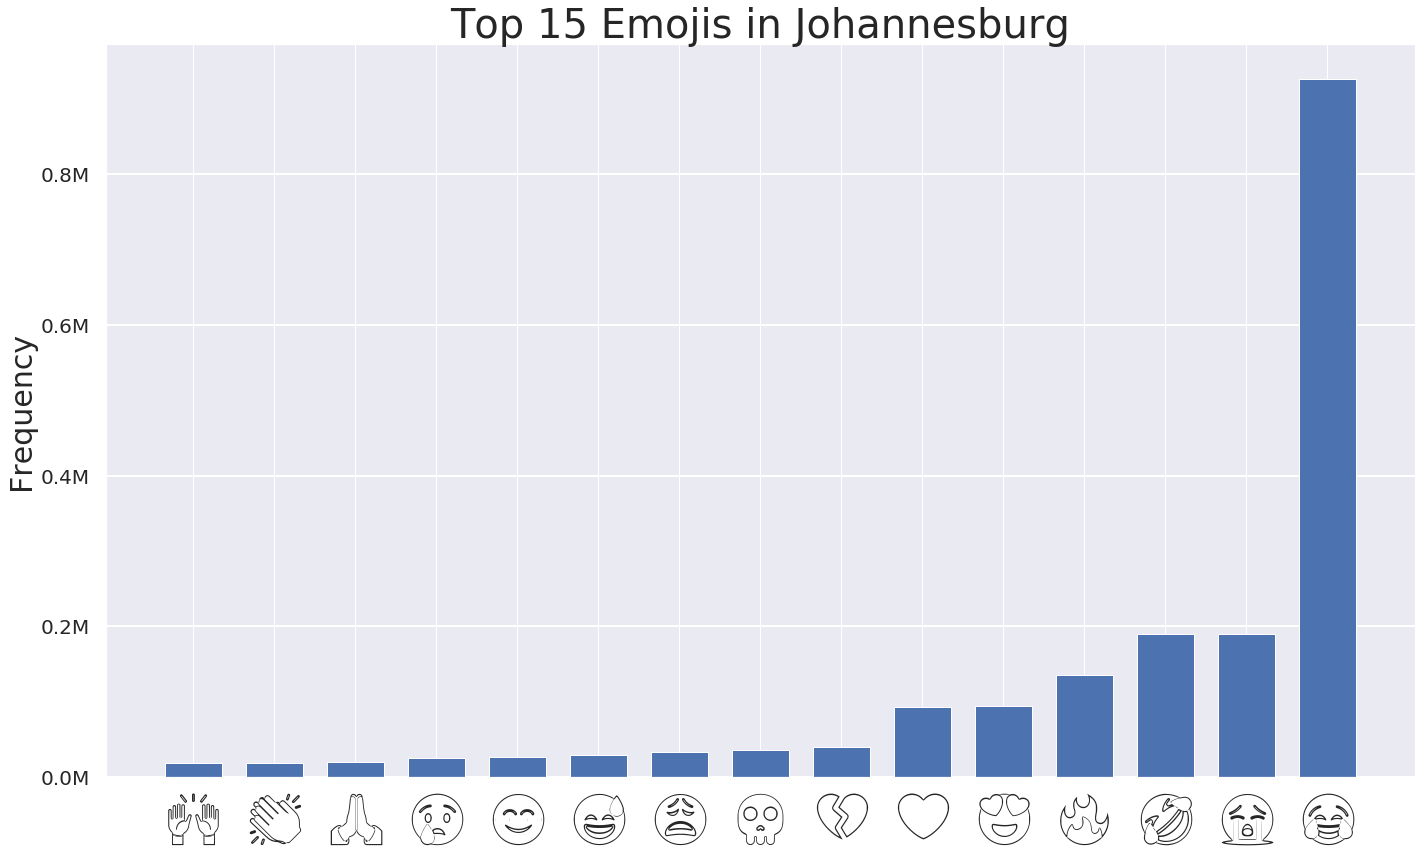

In [41]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values

# Millions Formatter Function
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

# Create a formatter
formatter_millions = FuncFormatter(millions)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)
#emojis_font = FontProperties(fname='./Fonts/emojione-android.ttf',size=30)

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_millions)
ax.tick_params(axis='both', which='major', pad=10)
plt.grid( linestyle='-', linewidth=2,axis='y')
plt.bar(x, y, width=0.7, bottom=None, align='center', data=emojis_count_df.tail(5))
plt.xticks(x, fontproperties=emojis_font)
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in Johannesburg', fontsize =40)
plt.tight_layout()
plt.show()


## Extract & Count Emojis for females

In [6]:
extract = Extractor()
#females = joh_join_df.loc[(joh_join_df['gender'] == 'female')& (joh_join_df['gender:confidence'].astype(float)==1)]

# Count emojis
count_females = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['gender'] == 'female')& (joh_join_df['gender:confidence'].astype(float)==1)]['text'])

# Display most common
count_females.most_common()

[('😂', 343932),
 ('😭', 82979),
 ('🤣', 72034),
 ('😍', 47731),
 ('❤', 44771),
 ('🔥', 28208),
 ('😩', 18882),
 ('💔', 17355),
 ('💀', 13263),
 ('😊', 12384),
 ('😢', 10108),
 ('💕', 8920),
 ('💃', 6814),
 ('😅', 6802),
 ('😘', 6787),
 ('🙄', 6643),
 ('♥', 6492),
 ('😹', 6339),
 ('👏', 5315),
 ('🙏', 5215),
 ('✨', 4990),
 ('😁', 4903),
 ('👀', 4867),
 ('🙌', 4846),
 ('🤔', 4561),
 ('🙈', 4553),
 ('🤗', 4268),
 ('😒', 3994),
 ('😔', 3982),
 ('☺', 3609),
 ('👌', 3320),
 ('😣', 3017),
 ('😫', 3007),
 ('🙃', 2993),
 ('😏', 2939),
 ('🙌🏾', 2872),
 ('😥', 2827),
 ('💛', 2814),
 ('💃🏽', 2744),
 ('😋', 2698),
 ('😑', 2686),
 ('😱', 2638),
 ('🎉', 2504),
 ('☹', 2465),
 ('😪', 2342),
 ('🙂', 2297),
 ('😕', 2262),
 ('🏆', 2259),
 ('🙏🏽', 2254),
 ('🙆', 2167),
 ('🌚', 2167),
 ('😳', 2166),
 ('👏🏾', 2150),
 ('🗣', 2148),
 ('😻', 2093),
 ('🙏🏾', 2064),
 ('😉', 2035),
 ('👏🏽', 2031),
 ('👑', 2021),
 ('😀', 2015),
 ('💖', 2003),
 ('😆', 1967),
 ('💃🏾', 1925),
 ('😃', 1858),
 ('💯', 1854),
 ('💜', 1852),
 ('🌸', 1780),
 ('🙌🏽', 1759),
 ('😐', 1743),
 ('😄', 1707),


## Create a Sorted Pandas DataFrame with Emoji Counts for females

In [7]:
# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_females:
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : count_females[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df

,Emoji,Count
1678,🧖‍♂️,1
1512,👩‍🚒,1
1513,🚰,1
1154,👩🏽,1
1156,🤺,1
1514,🤦🏿‍♂️,1
1515,👼🏿,1
1157,👨‍🎨,1
1517,👃,1
1518,👨‍✈️,1


## Top 15 Emojis Graph for females

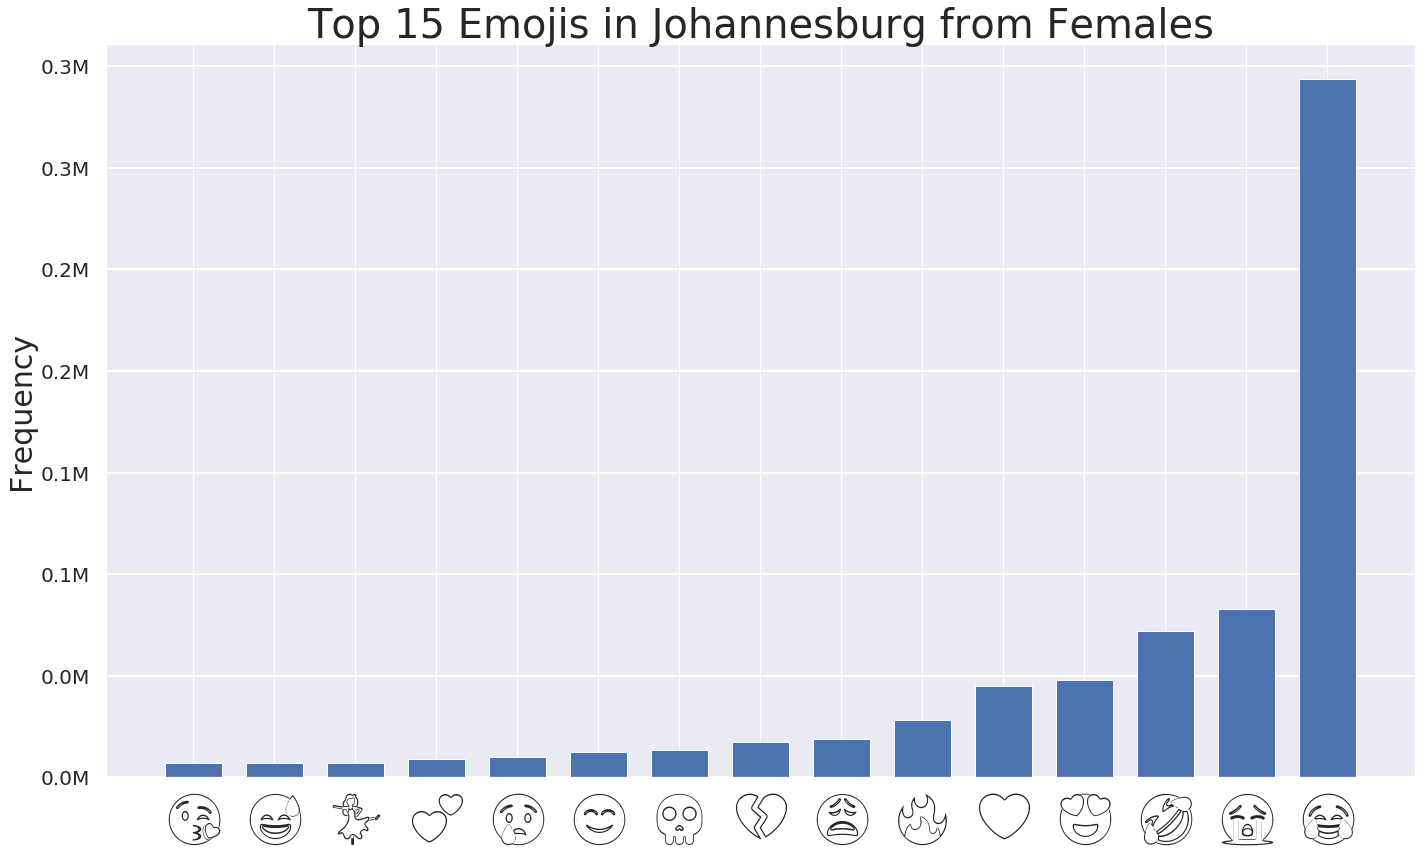

In [42]:
# Top 15 Values
x_females = emojis_count_females_df['Emoji'].tail(15).values
y_females = emojis_count_females_df['Count'].tail(15).values

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_millions)
ax.tick_params(axis='both', which='major', pad=10)
plt.grid( linestyle='-', linewidth=2,axis='y')
plt.bar(x_females, y_females, width=0.7, bottom=None, align='center', data=emojis_count_df.tail(5))
plt.xticks(x_females, fontproperties=emojis_font)
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in Johannesburg from Females', fontsize =40)
plt.tight_layout()
plt.show()